# Tarea 1

Jairo Saul Diaz Soto

Dr. Joaquin Peña Acevedo

Optimizacion I

2024 / 02 / 04

---
## Ejercicio 1

In [97]:
## Importando las librerias
import numpy as np
import matplotlib.pyplot as plt

### Declaracion del Metodo

In [98]:
## Metodo de seccion dorada
def golden_section_s(fnc, xl, xu, TOL, NMax):
    rho = (np.sqrt(5) - 1) / 2
    for k in range(NMax):
        b = rho * (xu-xl)
        x1 = xu - b
        x3 = xl + b
        if fnc(x1) < fnc(x3):
            xu = x3
            xk = x1
        if fnc(x1) > fnc(x3):
            xl = x1
            xk = x3
        if xu - xl < TOL:
            return [xk, fnc(xk)], [xl, xu], k, True

    return [xk, fnc(xk)], [xl, xu], k, False

---
### Primer funcion

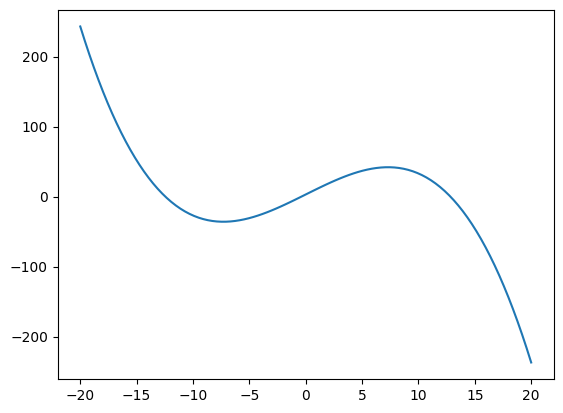

In [99]:
## Declarando las variables
N = 50
eps_m = np.finfo(float).eps
tol = eps_m**(1/3)
xl = -20
xu = 20

## Declarando la funcion
def fnc1(x):
    return -0.05*x**3 + 8*x + 3

xx = np.linspace(xl, xu, 100)
plt.plot(xx, fnc1(xx))

In [100]:
## Aplicando Seccion dorada a fnc1
sol, inter, iter, bres = golden_section_s(fnc1, xl, xu, tol, N)

In [101]:
print("La solucion se alcanzo en el punto: (", sol[0],', ',sol[1],')')
print('La solucion se alcanzo en la iteracion numero: ', iter)
print('El tamanio del intervalo fue de: ', inter[1] - inter[0])
print('La finalizacion termino con el status: ', bres)

La solucion se alcanzo en el punto: ( -7.302967212715323 ,  -35.94915964481176 )
La solucion se alcanzo en la iteracion numero:  32
El tamanio del intervalo fue de:  5.075371808160867e-06
La finalizacion termino con el status:  True


---
### Segunda funcion

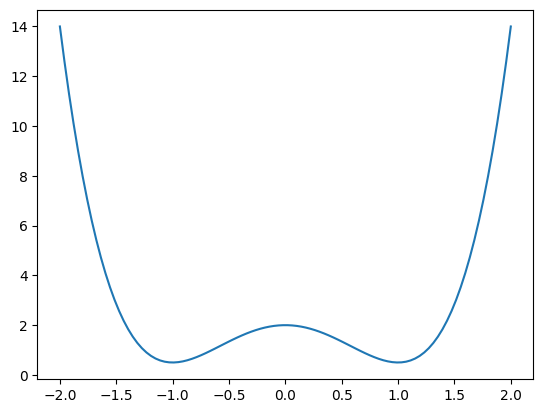

In [102]:
# Función objetivo 2
def fnc2(x):
    return 1.5*x**4 - 3*x**2 + 2
xl = -2
xu = 2
xx = np.linspace(xl, xu, 100)
plt.plot(xx, fnc2(xx))

In [103]:
## Aplicando Seccion dorada a fnc2
sol, inter, iter, bres = golden_section_s(fnc1, xl, xu, tol, N)

In [104]:
print("La solucion se alcanzo en el punto: (", sol[0],', ',sol[1],')')
print('La solucion se alcanzo en la iteracion numero: ', iter)
print('El tamanio del intervalo fue de: ', inter[1] - inter[0])
print('La finalizacion termino con el status: ', bres)

La solucion se alcanzo en el punto: ( -1.9999965212884105 ,  -12.599974257530608 )
La solucion se alcanzo en la iteracion numero:  27
El tamanio del intervalo fue de:  5.628673588997657e-06
La finalizacion termino con el status:  True


---
### Tercera funcion

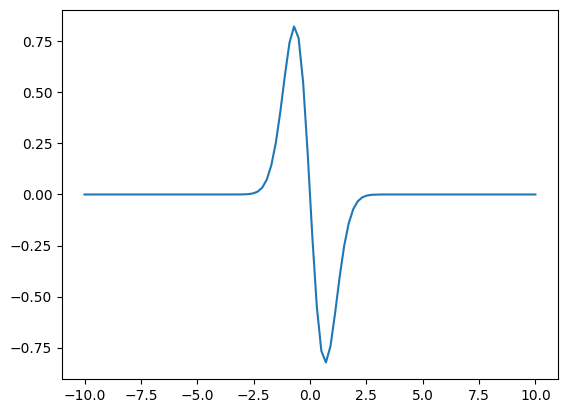

In [105]:
# Función objetivo 3
def fnc3(x):
    return -(x + np.sin(x))*np.exp(-x**2)
xl = -10
xu = 10
xx = np.linspace(xl, xu, 100)
plt.plot(xx, fnc3(xx))

In [106]:
## Aplicando Seccion dorada a fnc2
sol, inter, iter, bres = golden_section_s(fnc1, xl, xu, tol, N)

In [107]:
print("La solucion se alcanzo en el punto: (", sol[0],', ',sol[1],')')
print('La solucion se alcanzo en la iteracion numero: ', iter)
print('El tamanio del intervalo fue de: ', inter[1] - inter[0])
print('La finalizacion termino con el status: ', bres)

La solucion se alcanzo en el punto: ( -7.30296654293875 ,  -35.94915964481095 )
La solucion se alcanzo en la iteracion numero:  31
El tamanio del intervalo fue de:  4.106062045927672e-06
La finalizacion termino con el status:  True


---
## Ejercicio 2


### 1.- Prorgramando las funciones

In [108]:
##Definiendo la funcion de Griewangk
def griewangk(x):
    return (x[0]**2 + x[1]**2)/4000 - (np.cos(x[0])*np.cos(x[1]/np.sqrt(2))) + 1

def g(x, d, t):
    return griewangk([x[0] + (t*d[0]), x[1] + (t*d[1])])

---
### 2.- Gradiente
$$
f(x, y) = \frac{x^2 + y^2}{4000} + \cos (x) \cos(\frac{y}{\sqrt{2}}) + 1
$$

$$
\nabla f (x, y) = \left(\frac{x}{2000} + \sin (x) \cos(\frac{y}{\sqrt{2}}), \frac{y}{2000} + \frac{\cos (x)}{\sqrt{2}} \sin(\frac{y}{\sqrt{2}}) \right)
$$

In [109]:
##Definiendo la funcion gradiente
def grad_f(x):
    dfx = (x[0]/2000) + (np.sin(x[0])*np.cos(x[1]/np.sqrt(2)))
    dfy = (x[1]/2000) + (np.cos(x[0])*np.sin(x[1]/np.sqrt(2))/np.sqrt(2))
    return np.array([dfx, dfy])

---
### 3.- Derivadas direccionales

In [110]:
##Calculando las derivadas direccionales
x0 = np.array([3, 0.5])
p = np.array([2,1])
d0 = p / np.linalg.norm(p)
g0 = grad_f(x0) / np.linalg.norm(grad_f(x0))

In [111]:
##funcion para derivada direccional
def dir_deriv(grad_f, p_dir, x0):
    return grad_f(x0) @ p_dir

In [112]:
print('La derivada direccional de f en la direccion d0 es: ', dir_deriv(grad_f, d0, x0))
print('La derivada direccional de f en la direccion d0 es: ', dir_deriv(grad_f, -g0, x0))

La derivada direccional de f en la direccion d0 es:  0.011475034596120023
La derivada direccional de f en la direccion d0 es:  -0.27667848944420204


---
### 4.- Graficando la funcion G

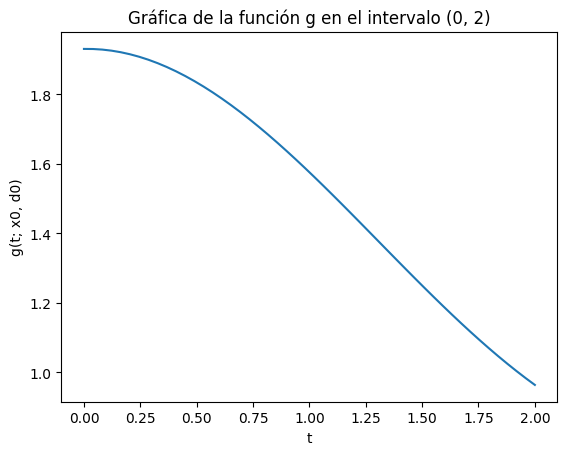

In [113]:
# Generar valores en el intervalo (0, 2)
intervalo = np.linspace(0, 2)
valores_t = [g(x0, d0, t) for t in intervalo]
plt.plot(intervalo, valores_t)
plt.xlabel('t')
plt.ylabel('g(t; x0, d0)')
plt.title('Gráfica de la función g en el intervalo (0, 2)')
plt.show()

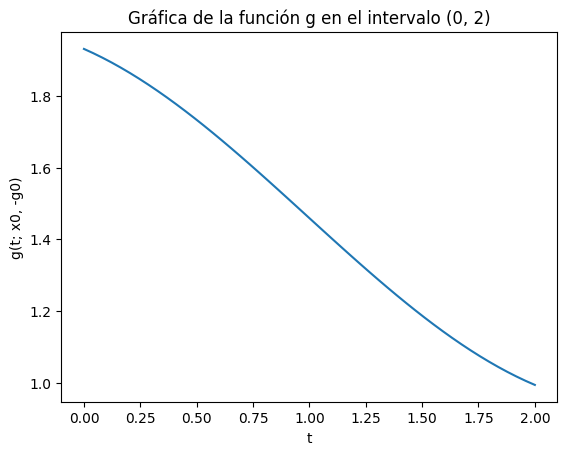

In [114]:
# Generar valores en el intervalo (0, 2)
intervalo = np.linspace(0, 2)
valores_t = [g(x0, -g0, t) for t in intervalo]
plt.plot(intervalo, valores_t)
plt.xlabel('t')
plt.ylabel('g(t; x0, -g0)')
plt.title('Gráfica de la función g en el intervalo (0, 2)')
plt.show()

---
### 5.- Seccion Dorada para G

In [115]:
##Redefinimos la funcion g para x0
def g1(t):
    x0 = np.array([3, 0.5])
    g0 = grad_f(x0) / np.linalg.norm(grad_f(x0))
    return g(x0, -g0, t)

In [116]:
##Aplicando el metodo
xl = 0
xu = 2
sol, inter, iter, bres = golden_section_s(g1, xl, xu, tol, N)

In [117]:
print("La solucion se alcanzo en el punto: (", sol[0],', ',sol[1],')')
print('La solucion se alcanzo en la iteracion numero: ', iter)
print('El tamanio del intervalo fue de: ', inter[1] - inter[0])
print('La finalizacion termino con el status: ', bres)

La solucion se alcanzo en el punto: ( 1.9999971856632055 ,  0.9932410001528889 )
La solucion se alcanzo en la iteracion numero:  26
El tamanio del intervalo fue de:  4.553692589448488e-06
La finalizacion termino con el status:  True


In [118]:
print('Valores de la funcion en x0')
print(x0)
print(griewangk(x0))

Valores de la funcion en x0
[3.  0.5]
1.9310723123875322


In [119]:
x1 = x0 - (sol[0]*g0)
print('Valores de la funcion en x1')
print(x1)
print(griewangk(x1))

Valores de la funcion en x1
[2.03215236 2.25021704]
0.9932410001528889


---
### 6.- Intervalo [0, 8]

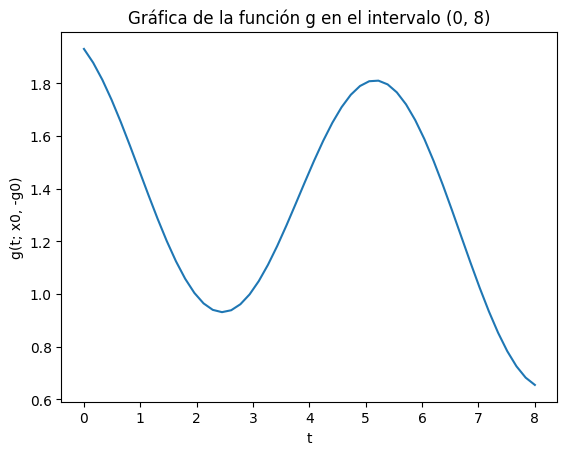

In [120]:
# Generar valores en el intervalo (0, 2)
intervalo = np.linspace(0, 8)
valores_t = [g(x0, -g0, t) for t in intervalo]
plt.plot(intervalo, valores_t)
plt.xlabel('t')
plt.ylabel('g(t; x0, -g0)')
plt.title('Gráfica de la función g en el intervalo (0, 8)')
plt.show()

In [121]:
##Aplicando el metodo
xl = 0
xu = 8
sol, inter, iter, bres = golden_section_s(g1, xl, xu, tol, N)

In [122]:
print("La solucion se alcanzo en el punto: (", sol[0],', ',sol[1],')')
print('La solucion se alcanzo en la iteracion numero: ', iter)
print('El tamanio del intervalo fue de: ', inter[1] - inter[0])
print('La finalizacion termino con el status: ', bres)

La solucion se alcanzo en el punto: ( 2.4561060376666815 ,  0.9315587863963393 )
La solucion se alcanzo en la iteracion numero:  29
El tamanio del intervalo fue de:  4.299923999084854e-06
La finalizacion termino con el status:  True


In [123]:
print('Valores de la funcion en x0')
print(x0)
print(griewangk(x0))

Valores de la funcion en x0
[3.  0.5]
1.9310723123875322


In [124]:
x1 = x0 - (sol[0]*g0)
print('Valores de la funcion en x1')
print(x1)
print(griewangk(x1))

Valores de la funcion en x1
[1.81143011 2.64936234]
0.9315587863963393


---
## Ejercicio 3

Sean $ \textbf(a, b) \in \mathbb{R}^n $. Calcule el gradiente y la Hessiana de  la funcion $f(\textbf{x}) = (\textbf{a}^T \textbf{x})(\textbf{b}^T \textbf{x})$

Por definicion el gradiente de una funcion es
$$
\nabla f (\textbf{x}) = \left[ \frac{\partial f}{\partial x_1},  \frac{\partial f}{\partial x_2}, \cdots, \frac{\partial f}{\partial x_n}\right]
$$

Para el iesimo termino se tiene que
$$
\frac{\partial f}{\partial x_i} = \frac{\partial}{\partial x_i} \left(\sum_{j=1}^n a_j x_j \cdot \sum_{k=1}^n b_k x_k \right) = a_i \sum_{k=1}^n b_k x_k + b_i \sum_{j=1}^n a_j x_j
$$
entonces
$$
\frac{\partial f}{\partial x_i} = a_i \textbf{b}^T\textbf{x} + b_i \textbf{a}^T\textbf{x}
$$

De lo cual se extiende que el gradiente de esta funcion es
$$
\nabla f (\textbf{x}) = (\textbf{a}^T \textbf{b} + \textbf{b}^T \textbf{a})\textbf{x}
$$

Para obtener la Hessiana, tomaremos la forma
$$
\nabla^2 f(\textbf{x}) = \nabla ( \nabla f(\textbf{x}))
$$
dado que $(\textbf{a}^T \textbf{b} + \textbf{b}^T \textbf{a}) \in \mathbb{R}$ se reduce a
$$
\nabla^2 f(\textbf{x}) = (\textbf{a}^T \textbf{b} + \textbf{b}^T \textbf{a})
$$


---
## Ejercicio 4

Tenemos los valores de la derivada direccional $ \frac{\partial f}{\partial \textbf{p}_i} $ de $f$ en el punto $\textbf{x}_0$ para tres direcciones $ \textbf{p}_i$:

$$\frac{\partial f}{\partial \textbf{p}_1} (\textbf{x}_0) = \frac{3}{\sqrt{2}} \hspace{6mm} \text{para} \hspace{6mm} \textbf{p}_1 = \left(0, \frac{1}{\sqrt{2}}, \frac{1}{\sqrt{2}} \right)$$

$$\frac{\partial f}{\partial \textbf{p}_2} (\textbf{x}_0) = \frac{1}{\sqrt{2}} \hspace{6mm} \text{para} \hspace{6mm} \textbf{p}_2 = \left(\frac{1}{\sqrt{2}}, 0, \frac{1}{\sqrt{2}} \right)$$

$$\frac{\partial f}{\partial \textbf{p}_3} (\textbf{x}_0) = - \frac{1}{\sqrt{2}} \hspace{6mm} \text{para} \hspace{6mm} \textbf{p}_3 = \left(\frac{1}{\sqrt{2}}, \frac{1}{\sqrt{2}, 0} \right)$$

A partir de esto calcule el vector gradiente $\nabla f(\textbf{x}_0)$

De acuerdo a la definicion de la derivada direccionale se tiene que
$$
 \frac{\partial f}{\partial \textbf{p}_i} = \nabla f (\textbf{x}_0) \textbf{p}_i
$$

donde 
$$
\nabla f  = \left[ \frac{\partial f}{\partial \textbf{x}_1},  \frac{\partial f}{\partial \textbf{x}_2}, \frac{\partial f}{\partial \textbf{x}_3} \right]
$$

sean
$$\frac{\partial f}{\partial \textbf{x}_1} = w $$
$$\frac{\partial f}{\partial \textbf{x}_2} = y $$
$$\frac{\partial f}{\partial \textbf{x}_2} = z $$


la derivada direccional se puede expresar como
$$
\frac{\partial f}{\partial \textbf{p}_i} = wp_{i,w} + yp_{i,y} + zp_{i,z}
$$

Aplicando esto a lo que se tiene queda lo siguiente

$$
\frac{\partial f}{\partial \textbf{p}_1} = \frac{y}{\sqrt{2}} + \frac{z}{\sqrt{2}} = \frac{3}{\sqrt{2}}
$$

$$
\frac{\partial f}{\partial \textbf{p}_2} = \frac{x}{\sqrt{2}} + \frac{z}{\sqrt{2}} = \frac{1}{\sqrt{2}}
$$

$$
\frac{\partial f}{\partial \textbf{p}_3} = \frac{x}{\sqrt{2}} + \frac{y}{\sqrt{2}} = -\frac{1}{\sqrt{2}}
$$

De la primera ecuacion se obtiene que $z = 3 -  y$

sustituyendo el valor de $z$ en la segunda ecuacion y despejando para x se obtiene que $x = y-2$

sustituyendo el valor de $x$ en la tercer ecuacion se tiene que $y = \frac{1}{2}$

Resolviendo, se tiene que el gradiente es el siguiente
$$
\nabla f (\textbf{x}_0) = \left(-\frac{3}{2}, \frac{1}{2}, \frac{5}{2} \right)
$$